## Machine Learning with Python - Regression


<img src="ForSale.jpg" alt="Drawing" style="width: 500px;height: 200px"/>

This section solves ML problems involving data points with real-valued labels $y$, which represent some quantity of interest. We often refer to such ML problems as **regression problems**. In this round, I applied some basic ML methods to solve a simple regression problem. These methods aim at finding or learning a good predictor function $h(\mathbf{x})$, which predicts the label $y$ based on the features $\mathbf{x}$ of a data point. The different methods are different combinations of particular choices for the type of predictor functions (hypothesis space) and loss function (the quality measure used to rank predictors). These different combinations offer different tradeoffs between **computationae'l complexity, robustness (against outliers) and accuracy**.  



## The Problem 

Assume you have secured an internship at a real estate broker in downtown Helsinki. Your firm has gathered a dataset obtained from previously sold houses in different areas of the city. Your task is to find out the relation between different characteristics (features) $\mathbf{x}$ and the price (label) $y$ of a sold house.

In order to solve this task you can use ML methods to find a good predictor map $h(\mathbf{x})$ such that $h(\mathbf{x}) \approx y$. The basic principle behind these methods is simple: Out of a given set of predictor functions (e.g. the set of linear functions) pick one that fits well the data points $(\mathbf{x}^{(i)},y^{(i)})$, $i=1,\ldots,m$, for which we know the true label values $y^{(i)}$. For the house price prediction problem, this labeled data is provided by the recordings of previous house sales.


## The Data

Our goal is to learn a good predictor $h(\mathbf{x})$ for the price $y$ of a house. The prediction $h(\mathbf{x})$ is based on several features (characteristics) $\mathbf{x} = \big(x_{1},\ldots,x_{n}\big)^{T}$ such as the average number of rooms per dwelling $x_{1}$ or the nitric oxides concentration $x_{2}$ near the house. 

To learn a good predictor $h(\mathbf{x})$,I used historic recordings of house sales. These recordings consist of $m$ data points. Each data pints is characterized by the house features $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$ and the selling price $y^{(i)}$. ML methods find or learn a good predictor $h(\mathbf{x})$ by minimizing the average error $h(\mathbf{x}^{(i)}) - y^{(i)}$ for $i=1,\ldots,m$.

<a id='handsondata'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Loading the Data.</p>
    
The following code snippet defines a function `X,y= GetFeaturesLabels(m,n)` which reads in data of previous house sales. The input parameters are the number `m` of data points and the number `n` of features to be used for each data point. The function returns a matrix $\mathbf{X}$ and vector $\mathbf{y}$. 

The features $\mathbf{x}^{(i)}$ of the sold houses are stored in the rows of the numpy array `X` (of shape (m,n)) and the corresponding selling prices $y^{(i)}$ in the numpy array `y` (shape (m,1)). The two arrays represent the feature matrix $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{(1)} & \ldots & \mathbf{x}^{(m)} \end{pmatrix}^{T}$ and the label vector $\mathbf{y} = \big( y^{(1)}, \ldots, y^{(m)} \big)^{T}$. 

</div>

In [1]:
# import "Pandas" library/package (and use shorthand "pd" for the package) 
# Pandas provides functions for loading (storing) data from (to) files
import pandas as pd  
from matplotlib import pyplot as plt 
from IPython.display import display, HTML
import numpy as np   
from sklearn.datasets import load_boston
import random

def GetFeaturesLabels(m=10, n=10):

    house_dataset = load_boston()
    house = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names) 
    x1 = house['RM'].values.reshape(-1,1)   # vector whose entries are the average room numbers for each sold houses
    x2 = house['NOX'].values.reshape(-1,1)  # vector whose entries are the nitric oxides concentration for sold houses


    x1 = x1[0:m]
    x2 = x2[0:m]
    np.random.seed(30)
    X = np.hstack((x1,x2,np.random.randn(m,n))) 
    
    X = X[:,0:n] 

    y = house_dataset.target.reshape(-1,1)  # creates a vector whose entries are the labels for each sold house
    y = y[0:m]

    return X, y


## Visualize Data

Scatter plots visualize data points by representing them as "dots" in the two-dimensional plane. Scatter plots can help to develop an intuition for the relation between features and labels of data points. 


<a id='drawplot'></a>
<div class=" alert alert-info">
    <p><b>Demo.</b> Scatter Plots.</p>
    <p>The code snippet below creates one scatterplot showing the first feature $x^{(i)}_{1}$ and the label $y^{(i)}$ (house price) for each data point. It also creates a second scatterplot with the second feature $x^{(i)}_{2}$ and the label $y^{(i)}$ (house price) for each data point.</p>
</div>

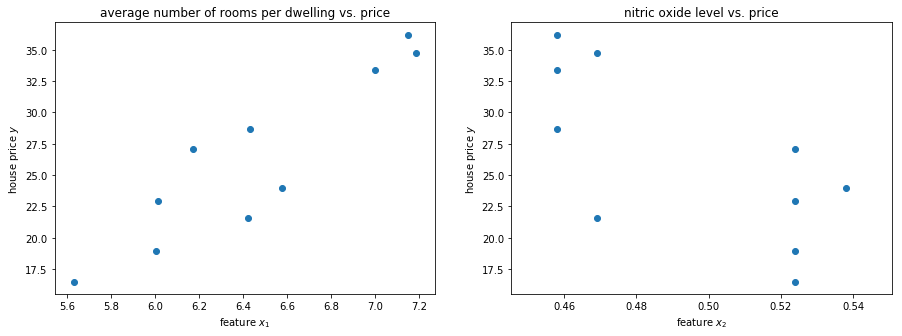

In [2]:
from matplotlib import pyplot as plt 

X,y = GetFeaturesLabels(10,10)
fig, axs = plt.subplots(1, 2,figsize=(15,5))
axs[0].scatter(X[:,0], y)
axs[0].set_title('average number of rooms per dwelling vs. price')
axs[0].set_xlabel(r'feature $x_{1}$')
axs[0].set_ylabel('house price $y$')

axs[1].scatter(X[:,1], y)
axs[1].set_xlabel(r'feature $x_{2}$')
axs[1].set_title('nitric oxide level vs. price')
axs[1].set_ylabel('house price $y$')

plt.show()

<a id='drawplot'></a>
<div class=" alert alert-info">

The following create scatterplot with x-axis representing feature $x^{(i)}_{4}$ and y-axis representingcthe label $y^{(i)}$ for each of the $m$ house sales $\big(\mathbf{x}^{(i)},y^{(i)}\big)$. 

</div>

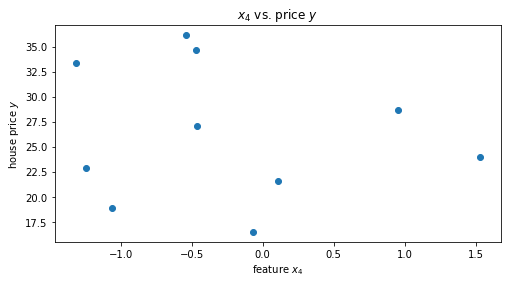

In [5]:
from matplotlib import pyplot as plt 

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.scatter(X[:,3], y)

axes.set_title('$x_{4}$ vs. price $y$')
axes.set_xlabel(r'feature $x_{4}$')
axes.set_ylabel('house price $y$')

plt.show()

## Linear Regression 

<a id='drawplot'></a>
<div class=" alert alert-info"><p><b>Demo.</b> Learn a Linear Predictor.</p>

The code snippet below shows how to use the `LinearRegression` class from the Python library `scikit-learn` to learn an optimal predictor from the set of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ using the squared error loss. 

The optimal weight vector $\mathbf{w}_{\rm opt}$ can be found by the function `LinearRegression.fit()`. The resulting optimal weight vector is stored in the variable `LinearRegression.coef_`. Using the optimal weight vector, we compute the training error 
\begin{equation}
(1/m) \sum_{i=1}^{m} \big( y^{(i)} - \mathbf{w}_{\rm opt}^{T} \mathbf{x}^{(i)} \big)^{2}. 
\end{equation}
and store it in the variable `training_error`. 

You can find the documentation of the `LinearRegression` class under [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

</div>

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display, Math

reg = LinearRegression(fit_intercept=False) 
reg = reg.fit(X, y)
training_error = mean_squared_error(y, reg.predict(X))

display(Math(r'$\mathbf{w}_{\rm opt} ='))
optimal_weight = reg.coef_
optimal_weight = optimal_weight.reshape(-1,1)
print(optimal_weight)
print("\nThe resuling training error is ",training_error)

<IPython.core.display.Math object>

[[ -10.30925972]
 [ 267.75090048]
 [  78.85900592]
 [  81.00711555]
 [   1.41629172]
 [  44.72519091]
 [ -30.07990617]
 [ -68.90596838]
 [ -48.69903423]
 [-102.31271894]]

The resuling training error is  2.524481114452073e-26


<a id='varying_features'></a>
<div class=" alert alert-warning">
    <p><b>Effect of varying features</b> Varying Number of Features. </p>
    
In principle, we can freely choose how many of the available features $x_{1}, x_{2},\ldots,x_{n}$ 
of a house you want to use, to predict the house price $y$. The effect of using a varying number $r \leq n$ of features on the resulting training error and computational complexity (runtime) of linear regression is shown in the code bellow. For each $r=1,2,\ldots,10$, fit a linear model (using `LinearRegression(fit_intercept=False)` to the house sales dataset (using $m=10$ data points) by using only the first $r$ features $x_{1},...,x_{r}$ of a house. 
<br />    
- You can get the first $r$ features and labels for the previously sold houses using `GetFeaturesLabels(m,r)`.<br />
- For each value of $r$, determine the computation time of the fitting method `LinearRegression.fit()` and the resulting training error (using the Python function `mean_squared_error()`) of the fitted linear model. <br />
- The results should be stored in two vectors `linreg_time` (multiply by 1000 to get time in milliseconds) and `linreg_error`. <br />
- You can measure the computation time with Python function `time.time()` as demonstrated in Round 1.

</div>

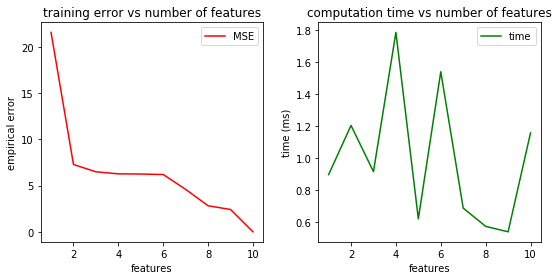

In [10]:
import time

m = 10                            # we use 10 data points of the house sales database 
max_r = 10                        # maximum number of features used 

X,y = GetFeaturesLabels(m,max_r)  # read in m data points using max_r features 

linreg_time = np.zeros(max_r)     # vector for storing the exec. times of LinearRegresion.fit() for each r
linreg_error = np.zeros(max_r)    # vector for storing the training error of LinearRegresion.fit() for each r


for r in range(max_r):
    X,y = GetFeaturesLabels(m, max_r)     # read in m data points using max_r features
    X = X[:,:r+1]
    start_time = time.time()
    reg = reg.fit(X, y)
    training_error = mean_squared_error(y, reg.predict(X))
    end_time = time.time()
    duration = (end_time - start_time)*1000
    linreg_time[r] = duration
    linreg_error[r] = training_error
       



# linreg_time = ... 
# linreg_error = ... 
# Hint: loop "r" times.


# YOUR CODE HERE
#raise NotImplementedError()

plot_x = np.linspace(1, max_r, max_r, endpoint=True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(plot_x, linreg_error, label='MSE', color='red')
axes[1].plot(plot_x, linreg_time, label='time', color='green')
axes[0].set_xlabel('features')
axes[0].set_ylabel('empirical error')
axes[1].set_xlabel('features')
axes[1].set_ylabel('time (ms)')
axes[0].set_title('training error vs number of features')
axes[1].set_title('computation time vs number of features')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

<a id='varying_features'></a>
<div class=" alert alert-warning">
<p><b>Varying Number of Data Points</b> 
<p>Beside the number of features which are used to describe a data point, another important parameter of a data set is the number $m$ of data points it contains. Intuitively, having more labeled data points to find or learn a good predictor should be beneficial. Let us now explore the effect of using an increasing number $m$ of data points on the resulting training error. </p>


- For each choice $m=1,2,\ldots,10$ read in the first $m$ data points of previously sold houses using $n=2$ features. This can be done using `GetFeaturesLabels(m,2)`.
- For each $m$, fit a linear model (using `LinearRegression(fit_intercept=False)` to the first $m$ data points.
- Store the resulting training errors in the numpy array `train_error` of shape (10,1). The $m$th entry of this array should be the training error obtained when using $m$ data points. Note that the first entry of a numpy array has index $0$. 

</div>

7.967770288277229


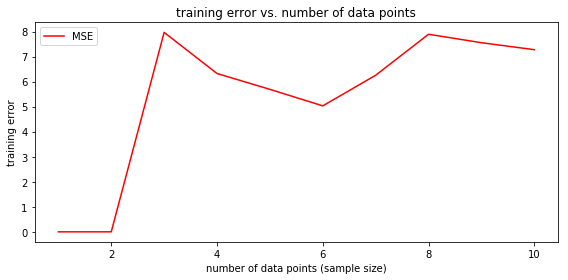

In [11]:
import time

max_m = 10                            # maximum number of data points 
X, y = GetFeaturesLabels(max_m, 2)      # read in max_m data points using n=2 features 
train_error = np.zeros(max_m)         # vector for storing the training error of LinearRegresion.fit() for each r



for m in range(max_m):
    X, y = GetFeaturesLabels(max_m, 2)    # read in max_m data points using n=2 features
    X=X[:m+1,:]
    y=y[:m+1,:]
    reg = reg.fit(X, y)
    error = mean_squared_error(y, reg.predict(X))
    train_error[m] = error 
    

# train_error = ... 
# Hint: loop "max_m" times.


# YOUR CODE HERE
#raise NotImplementedError()
print(train_error[2])
plot_x = np.linspace(1, max_r, max_r, endpoint=True)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
axes.plot(plot_x, train_error, label='MSE', color='red')
axes.set_xlabel('number of data points (sample size)')
axes.set_ylabel('training error')
axes.set_title('training error vs. number of data points')
axes.legend()
plt.tight_layout()
plt.show()

<a id='drawplot'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Robustness Against Outliers.</p>

An **outlier** refers to a data point which is intrinsically different from all other data points, e.g., due to measurement errors. Imagine that for some reason, the first data point in the house sales database is such an erroneous outlier. We would then prefer ML methods not to be affected too much by an error in a single data point.

<p>The code snippet below considers fitting a linear model for house prices $y$ based on a single feature $x_{1}$. The resulting linear predictor minimizes the average squared error loss on the training data. We then intentionally perturb the first data point by setting $y_{1}^{(1)}$ to an unreasonable value. Using this corrupted data set, we then fit again a linear model and compare the so-obtained linear predictor to the linear predictor obtained from the "clean" data set.</p> 
</div>

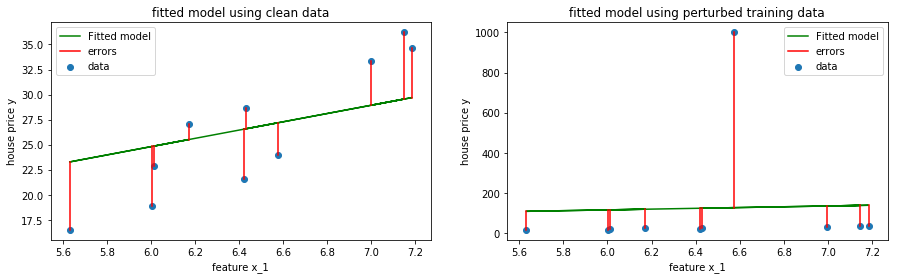

optimal weight w_opt by fitting to (training on) clean training data :  [[4.13405764]]
optimal weight w_opt by fitting to (training on) perturbed training data :  [[19.43224588]]


In [13]:
from sklearn import linear_model

X,y = GetFeaturesLabels(10,1)   # read in 10 data points with single feature x_1 and label y 


### fit a linear model to the clean data 
reg = linear_model.LinearRegression(fit_intercept=False)
reg = reg.fit(X, y)
y_pred = reg.predict(X)

# now we intentionally perturb the label of the first data point 

y_perturbed = np.copy(y)  
y_perturbed[0] = 1000; 

### fit a linear model to the perturbed data 

reg1 = linear_model.LinearRegression(fit_intercept=False)
reg1 = reg1.fit(X, y_perturbed)
y_pred_perturbed = reg1.predict(X)


fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes[0].scatter(X, y, label='data')
axes[0].plot(X, y_pred, color='green', label='Fitted model')


# now add individual line for each error point
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors') # add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1]) # same X
    lineYdata = (y[i+1], y_pred[i+1]) # different Y
    axes[0].plot(lineXdata, lineYdata, color='red')


axes[0].set_title('fitted model using clean data')
axes[0].set_xlabel('feature x_1')
axes[0].set_ylabel('house price y')
axes[0].legend()

axes[1].scatter(X, y_perturbed, label='data')
axes[1].plot(X, y_pred_perturbed, color='green', label='Fitted model')


# now add individual line for each error point
axes[1].plot((X[0], X[0]), (y_perturbed[0], y_pred_perturbed[0]), color='red', label='errors') # add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1]) # same X
    lineYdata = (y_perturbed[i+1], y_pred_perturbed[i+1]) # different Y
    axes[1].plot(lineXdata, lineYdata, color='red')


axes[1].set_title('fitted model using perturbed training data')
axes[1].set_xlabel('feature x_1')
axes[1].set_ylabel('house price y')
axes[1].legend()

plt.show()
plt.close('all') # clean up after using pyplot

print("optimal weight w_opt by fitting to (training on) clean training data : ", reg.coef_)
print("optimal weight w_opt by fitting to (training on) perturbed training data : ", reg1.coef_)


## Using Different Loss Function 

We can see from the demo above that the resulting linear predictor is heavily affected by corrupting only one single data point. The reason for this sensitivity is rooted in the properties of the squared error loss function used by the class `LinearRegression()`. Indeed by using the loss $(\hat{y} - y)^{2}$ we force the predictor $\hat{y}$ to not be too far away from any data point with very large value $y$ of the true label. 

It turns out that using a different loss function to learn a linear predictor can make the learning robust against few outliers. One such robust loss function is known as "Huber loss" $\mathcal{L}(\hat{y},y)$. Given a data point with label $y$ and a predicted label $\hat{y}=h(\mathbf{x})$ the Huber loss is defined as 
$$\mathcal{L}(y,\hat{y}) = \begin{cases} (1/2) (y-\hat{y})^{2} & \mbox{ for } |y-\hat{y}| \leq  c \\ 
c (|y-\hat{y}| - c/2) & \mbox{ else. }\end{cases}$$

Note that the Huber loss contains a parameter $c$ which has to be adapted to the application at hand. To learn a linear predictor $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ which minimizes the average Huber loss over the labeled data points in the training set we can use the [`HuberRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html) class.

The Huber loss contains two important special cases. The first special case is obtained when $c$ is chosen very large (the precise value depending on the value range of the features and labels) such that the condition $|y-\hat{y}| \leq  c$ is always satisfied. In this case, the Huber loss becomes the squared error loss $(y-\hat{y})^{2}$ (with an additional factor 1/2). The second special case is obtained for choosing $c$ very small (close to $0$) such that the condition $|y-\hat{y}| \leq  c$ is never satisfied. In this case, the Huber loss becomes the absolute loss $|y - \hat{y}|$ scaled by a factor $c$.

<a id='drawplot'></a>
<div class=" alert alert-info"><b>Demo.</b> Squared Error and Huber Loss.

The code below plots the squared error loss and the Huber loss for different choices of the parameter $c$. Note that the Huber loss reduces to the squared error loss for a sufficiently large value of the parameter $c$. 
</div>

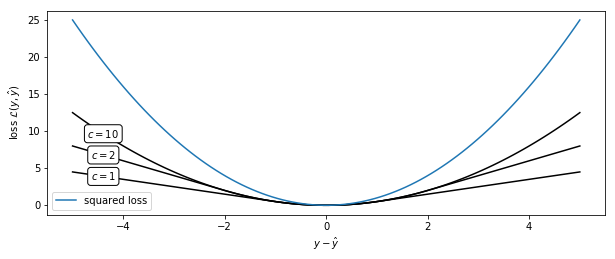

In [15]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt



#------------------------------------------------------------
# Define the Huber loss
def Phi(t, c):
    t = abs(t)
    flag = (t > c)
    return (~flag) * (0.5 * t ** 2) - (flag) * c * (0.5 * c - t)

#------------------------------------------------------------
# Plot for several values of c
fig = plt.figure(figsize=(10, 3.75))
ax = fig.add_subplot(111)

x = np.linspace(-5, 5, 100)

for c in (1,2,10):
    y = Phi(x, c)
    ax.plot(x, y, '-k')

    if c > 10:
        s = r'\infty'
    else:
        s = str(c)

    ax.text(x[6], y[6], '$c=%s$' % s,
            ha='center', va='center',
            bbox=dict(boxstyle='round', ec='k', fc='w'))

ax.plot(x,np.square(x),label="squared loss")

ax.set_xlabel(r'$y - \hat{y}$')
ax.set_ylabel(r'loss $\mathcal{L}(y,\hat{y})$')
ax.legend()
plt.show()

<a id='drawplot'></a>
<div class=" alert alert-info">
<p><b>Demo.</b> Robustness Against Outliers II.</p>

<p>The code snippet below fits a linear model for house prices $y$ based on a single feature $x_{1}$ using the Huber loss. We also intentionally perturb the first data point by setting $y_{1}^{(1)}$ to an unreasonable value. Using this corrupted data set, we fit a linear model (under Huber loss) again and compare the so-obtained linear predictor to the linear predictor obtained from the "clean" data set.</p>
</div>

/home/luqmon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luqmon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


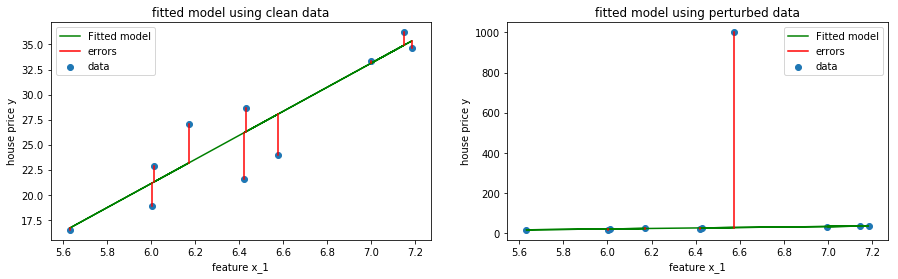

optimal weight w_opt by fitting on clean data :  [12.02887988]
optimal weight w_opt by fitting on perturbed data :  [12.06336531]


In [16]:
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor

X,y = GetFeaturesLabels(10,1)   # read in 10 data points with single feature x_1 and label y 


### fit a linear model (using Huber loss) to the clean data 

reg = HuberRegressor().fit(X, y)
y_pred = reg.predict(X)

# now we intentionaly perturb the label of the first data point 

y_perturbed = np.copy(y)  
y_perturbed[0] = 1000; 

### fit a linear model (using Huber loss) to the perturbed data 

#reg1 = linear_model.LinearRegression(fit_intercept=False)
reg1 = HuberRegressor().fit(X, y_perturbed)
y_pred_perturbed = reg1.predict(X)


fig, axes = plt.subplots(1, 2, figsize=(15, 4))
axes[0].scatter(X, y, label='data')
axes[0].plot(X, y_pred, color='green', label='Fitted model')


# now add individual line for each error point
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors') # add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1]) # same X
    lineYdata = (y[i+1], y_pred[i+1]) # different Y
    axes[0].plot(lineXdata, lineYdata, color='red')


axes[0].set_title('fitted model using clean data')
axes[0].set_xlabel('feature x_1')
axes[0].set_ylabel('house price y')
axes[0].legend()

axes[1].scatter(X, y_perturbed, label='data')
axes[1].plot(X, y_pred_perturbed, color='green', label='Fitted model')


# now add individual line for each error point
axes[1].plot((X[0], X[0]), (y_perturbed[0], y_pred_perturbed[0]), color='red', label='errors') # add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1]) # same X
    lineYdata = (y_perturbed[i+1], y_pred_perturbed[i+1]) # different Y
    axes[1].plot(lineXdata, lineYdata, color='red')


axes[1].set_title('fitted model using perturbed data')
axes[1].set_xlabel('feature x_1')
axes[1].set_ylabel('house price y')
axes[1].legend()

plt.show()
plt.close('all') # clean up after using pyplot

print("optimal weight w_opt by fitting on clean data : ", reg.coef_)
print("optimal weight w_opt by fitting on perturbed data : ", reg1.coef_)

<a id='varying_features'></a>
<div class=" alert alert-info">
    <p><b>Demo</b> Varying Number of Features with Huber Loss. </p>
    
In principle you can choose how many of the available features $x_{1}, x_{2},\ldots,$ 
of a house you want to use to in order to predict the house price $y$. Let us now explore 
the effect of using a varying number $r$ of features on the resulting error and 
computational complexity (runtime). <br />

In particular, for each $r=1,2,\ldots,10$, the code snippet below fits a linear model under 
Huber loss to the house sales dataset (using $m=10$ data points) by using only the 
first $r$ features $x_{1},...,x_{r}$ of a house. 
<br />    
- The first $r$ features and labels for the previously sold houses can be obtained using `GetFeaturesLabels(m,r)`.<br />
- For each value of $r$, the computation time of the fitting method `HuberRegressor.fit()` and the resulting training error (using the Python function `mean_squared_error()`) of the fitted linear model. <br />
- The results are stored in two vectors `linreg_time` (multiply by 1000 to get time in milliseconds) and `linreg_error`. 

</div>

/home/luqmon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luqmon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luqmon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/luqmon/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

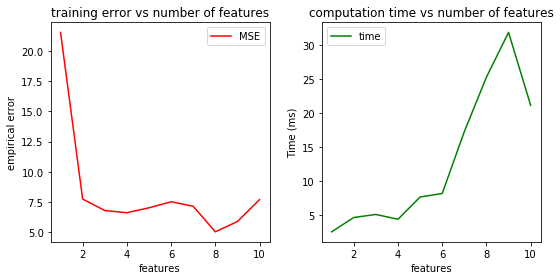

In [17]:
import time

m = 10                            # we use 100 data points of the house sales database 
max_r = 10                        # maximum number of features used 

X,y = GetFeaturesLabels(m,max_r)  # read in 100 data points using 10 features 

linreg_time = np.zeros(max_r)     # vector for storing the exec. times of LinearRegresion.fit() for each r
linreg_error = np.zeros(max_r)    # vector for storing the training error of LinearRegresion.fit() for each r


for r in range(max_r):
    reg_hub = HuberRegressor(fit_intercept=False) 
    start_time = time.time()
    reg_hub = reg_hub.fit(X[:,:(r+1)], y)
    end_time = (time.time() - start_time)*1000
    linreg_time[r] = end_time
    pred = reg_hub.predict(X[:,:(r+1)])
    linreg_error[r] = mean_squared_error(y, pred)

plot_x = np.linspace(1, max_r, max_r, endpoint=True)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(plot_x, linreg_error, label='MSE', color='red')
axes[1].plot(plot_x, linreg_time, label='time', color='green')
axes[0].set_xlabel('features')
axes[0].set_ylabel('empirical error')
axes[1].set_xlabel('features')
axes[1].set_ylabel('Time (ms)')
axes[0].set_title('training error vs number of features')
axes[1].set_title('computation time vs number of features')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()